## Waffle House Index Monitor
As COVID-19 progresses, Waffle House - a southern staple known for being the gauge by which FEMA attributes severity of natural disasters - is responding by shutting down locations, which matches the level of unprecedentedness of this global pandemic. For locations that remain open, they are doing To-Go orders for all customers.

This notebook allows you to access their locations API and make your own map of current closures. More features may be added later to get fancier.

In [21]:
import geopandas as gpd
import pandas as pd
import requests
import fiona

In [2]:
url = 'https://locations.wafflehouse.com/api/587d236eeb89fb17504336db/locations-details'

In [3]:
data = requests.get(url)

In [8]:
gdf = gpd.read_file(url)

In [9]:
gdf.head()

,name,id,branch,slug,addressLine1,addressLine2,city,province,postalCode,country,...,locationsListCta,website,mallName,shortDescription,longDescription,snippetDescription,email,manuallyAddedListings,socialMedias,geometry
0,Waffle House,57129dbbc49072572ed4ab15,1976,nc-lenoir-1976,220 Blowing Rock Blvd,,Lenoir,NORTH CAROLINA,28645,UNITED STATES,...,{'ctas': []},https://locations.wafflehouse.com/nc-lenoir-1976,,"All food is prepared fresh, cooked to order an...","Headquartered in Norcross, GA, Waffle House® r...","Open 24 hours a day, 365 days a year.",,"[ { ""url"": ""https:\/\/www.yelp.com\/biz\/waffl...","[ { ""name"": ""facebook"", ""url"": ""https:\/\/www....",POINT (-81.52418 35.91727)
1,Waffle House,571429266d0acf1a2d60eb13,1973,ar-north-little-rock-1973,7300 Innerplan Dr,,North Little Rock,ARKANSAS,72113-7645,UNITED STATES,...,{'ctas': []},https://locations.wafflehouse.com/ar-north-lit...,,"All food is prepared fresh, cooked to order an...","Headquartered in Norcross, GA, Waffle House® r...","Open 24 hours a day, 365 days a year.",,"[ { ""url"": ""https:\/\/www.yelp.com\/biz\/waffl...","[ { ""name"": ""facebook"", ""url"": ""https:\/\/www....",POINT (-92.37741 34.82474)
2,Waffle House,5714292fc49072572ed4ab86,1950,sc-darlington-1950,1520 S Main St,,Darlington,SOUTH CAROLINA,29532-5660,UNITED STATES,...,{'ctas': []},https://locations.wafflehouse.com/sc-darlingto...,,"All food is prepared fresh, cooked to order an...","Headquartered in Norcross, GA, Waffle House® r...","Open 24 hours a day, 365 days a year.",,"[ { ""url"": ""https:\/\/www.yelp.com\/biz\/waffl...","[ { ""name"": ""facebook"", ""url"": ""https:\/\/www....",POINT (-79.85614 34.28085)
3,Waffle House,571504900b912de13ea624da,201,ms-gulfport-201,4324 W Beach Blvd,,Gulfport,MISSISSIPPI,39501-1327,UNITED STATES,...,{'ctas': []},https://locations.wafflehouse.com/ms-gulfport-201,,"All food is prepared fresh, cooked to order an...","Headquartered in Norcross, GA, Waffle House® r...","Open 24 hours a day, 365 days a year.",,"[ { ""url"": ""https:\/\/www.yelp.com\/biz\/waffl...","[ { ""name"": ""facebook"", ""url"": ""https:\/\/www....",POINT (-89.11364 30.35832)
4,Waffle House,571504a40b912de13ea624dc,206,tx-arlington-206,2221 S Cooper St,,Arlington,TEXAS,76013-6327,UNITED STATES,...,{'ctas': []},https://locations.wafflehouse.com/tx-arlington...,,"All food is prepared fresh, cooked to order an...","Headquartered in Norcross, GA, Waffle House® r...","Open 24 hours a day, 365 days a year.",,"[ { ""url"": ""https:\/\/www.yelp.com\/biz\/waffl...","[ { ""name"": ""facebook"", ""url"": ""https:\/\/www....",POINT (-97.11660 32.70669)


In [10]:
gdf.columns

Index(['name', 'id', 'branch', 'slug', 'addressLine1', 'addressLine2', 'city',
       'province', 'postalCode', 'country', 'phoneNumber', 'phoneLabel',
       'hoursOfOperation', 'cmsFeatures', 'storeFront', 'timezone',
       'locationsListCta', 'website', 'mallName', 'shortDescription',
       'longDescription', 'snippetDescription', 'email',
       'manuallyAddedListings', 'socialMedias', 'geometry'],
      dtype='object')

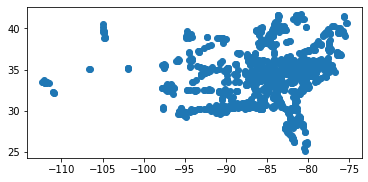

In [11]:
gdf.plot()

In [12]:
gdf.iloc[3]

name                                                          Waffle House
id                                                571504900b912de13ea624da
branch                                                                 201
slug                                                       ms-gulfport-201
addressLine1                                             4324 W Beach Blvd
addressLine2                                                              
city                                                              Gulfport
province                                                       MISSISSIPPI
postalCode                                                      39501-1327
country                                                      UNITED STATES
phoneNumber                                                +1 228-867-9911
phoneLabel                                                  (228) 867-9911
hoursOfOperation         {'Mon': [['00:00', '23:59']], 'Tue': [['00:00'...
cmsFeatures              

In [15]:
metadata = data.json()

In [32]:
metadata['features'][3]['properties']['slug']

'ms-gulfport-201'

In [54]:
loc_isClosed = []
for feature in metadata['features']:
    dict1 = {}
    slug = {'slug' : feature['properties']['slug']}
    dict1.update(slug)
    try:
        isClosed = {'isClosed' : feature['properties']['specialHoursOfOperation'][0]['isClosed']}
        dict1.update(isClosed)
    except:
        isClosed = {'isClosed' : False}
        dict1.update(isClosed)
    finally:
        loc_isClosed.append(dict1)

In [56]:
loc_closed = pd.DataFrame(loc_isClosed)

Lets Merge the isClosed with our geopandas frame, by using `merge`

In [59]:
gdf_closures = gdf.merge(loc_closed, on='slug')

In [72]:
gdf_closures = gdf_closures.to_crs("EPSG:5070")

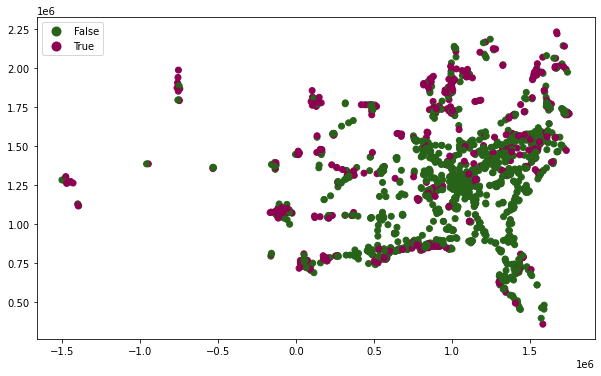

In [88]:
ax = gdf_closures.plot(cmap = 'PiYG_r', column='isClosed', legend=True, categorical = True, figsize=(10,15))

In [82]:
num_closed = gdf_closures.query('isClosed == True').isClosed.count()

In [80]:
total_loc = gdf_closures.isClosed.count()

In [89]:
ax.set_title(f'Waffle House Index: {num_closed} of {total_loc} Closed')

Text(0.5, 1.0, 'Waffle House Index: 438 of 1967 Closed')